In [36]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense


In [37]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [38]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

x_train , x_test = x_train/255.0 , x_test/255.0

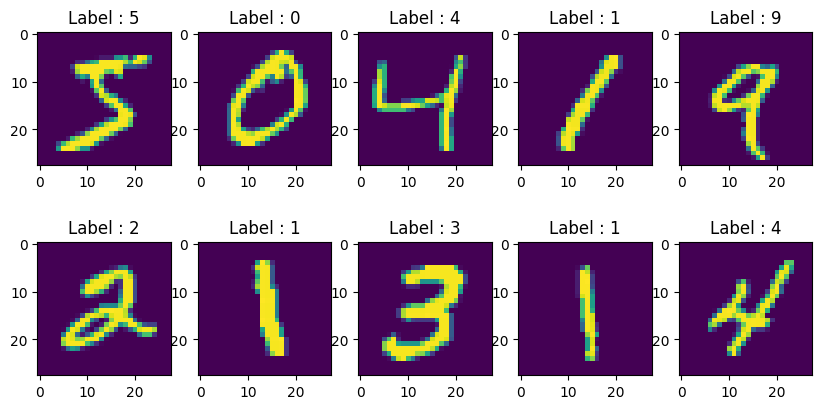

In [50]:
import matplotlib.pyplot as plt
import numpy as np
plt , axes = plt.subplots(2,5 ,figsize= (10,5))

for i , ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.set_title(f'Label : {np.argmax(y_train[i])}')

In [40]:
cnn = Sequential([
    Conv2D(32,kernel_size=(4,4),activation='relu' , input_shape=(28,28,1)),
    MaxPool2D((2,2)),
    Conv2D(32,kernel_size=(4,4),activation='relu' ),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(128 , activation='relu'),
    Dense(64 , activation='relu'),
    Dense(10, activation='softmax')
])

In [41]:
cnn.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 9, 9, 32)       │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,530 (357.54 KB)

 Trainable params: 91,530 (357.54 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
cnn.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics= ['accuracy'])

In [43]:
model = cnn.fit(x_train,y_train,validation_data=(x_test,y_test) , epochs=4)

Epoch 1/4


2024-11-11 18:01:34.900352: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8831 - loss: 0.3643 - val_accuracy: 0.9842 - val_loss: 0.0510
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9827 - loss: 0.0536 - val_accuracy: 0.9833 - val_loss: 0.0524
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9882 - loss: 0.0357 - val_accuracy: 0.9882 - val_loss: 0.0381
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9924 - loss: 0.0254 - val_accuracy: 0.9883 - val_loss: 0.0413


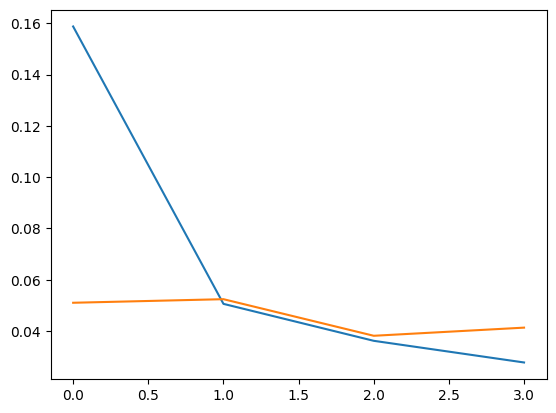

In [45]:
import matplotlib.pyplot as plt
plt.plot(model.history['loss'] , label = 'loss')
plt.plot(model.history['val_loss'] , label = 'val_loss')

In [47]:
pred = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/tmp/ipykernel_52871/485500989.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


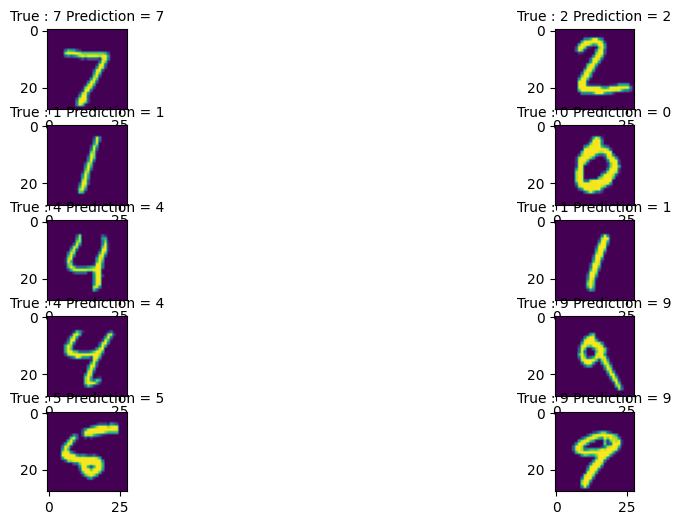

In [57]:
import matplotlib.pyplot as plt

plt , axes = plt.subplots(5,2 , figsize = (12,6))

for i , ax in enumerate(axes.flatten()):

    ax.imshow(x_test[i])
    predict = np.argmax(pred[i])
    true = np.argmax(y_test[i])
    ax.set_title(f'True : {true} Prediction = {predict}' , fontsize = 10)

plt.show()


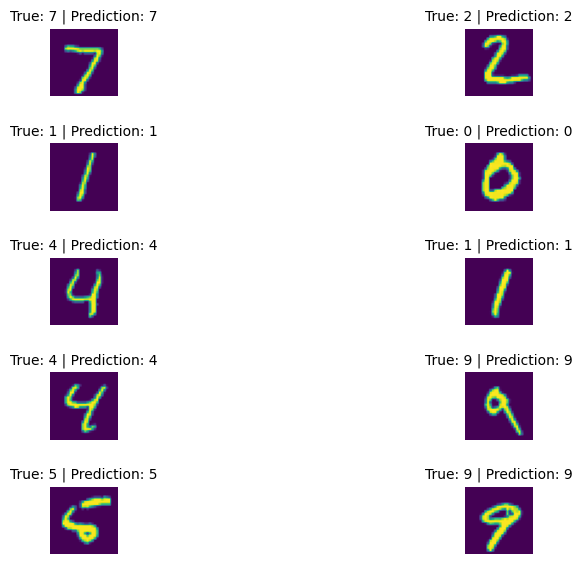

In [62]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(5, 2, figsize=(12, 6))  # Create figure and axes

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_test[i])  # Display each image
    predict = np.argmax(pred[i])  # Get the predicted class index
    true = np.argmax(y_test[i])  # Get the true class index
    ax.set_title(f'True: {true} | Prediction: {predict}', fontsize=10)  # Set the title
    ax.axis('off')  # Hide the axis

plt.tight_layout(pad=2.0)  # Adjust layout for better spacing
plt.show()
